In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import re
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics import jaccard_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
document_1 = open('Liverpool.txt', 'r')
document_2 = open('Computer_Science.txt', 'r')

Liverpool = document_1.read().lower()
Computer_science = document_2.read().lower()

Liverpool = word_tokenize(Liverpool)
Computer_science = word_tokenize(Computer_science)

print(Liverpool)
print(Computer_science)

document_1.close()
document_2.close()

['liverpool', 'football', 'club', 'is', 'a', 'professional', 'football', 'club', 'based', 'in', 'liverpool', ',', 'england', '.', 'the', 'club', 'competes', 'in', 'the', 'premier', 'league', ',', 'the', 'top', 'tier', 'of', 'english', 'football', '.', 'founded', 'in', '1892', ',', 'the', 'club', 'joined', 'the', 'football', 'league', 'the', 'following', 'year', 'and', 'has', 'played', 'its', 'home', 'games', 'at', 'anfield', 'since', 'its', 'formation', '.', 'liverpool', 'is', 'one', 'of', 'the', 'most', 'valuable', 'and', 'widely', 'supported', 'clubs', 'in', 'the', 'world', '.', 'domestically', ',', 'the', 'club', 'has', 'won', 'nineteen', 'league', 'titles', ',', 'eight', 'fa', 'cups', ',', 'a', 'record', 'ten', 'league', 'cups', 'and', 'sixteen', 'fa', 'community', 'shields', '.', 'in', 'international', 'competitions', ',', 'the', 'club', 'has', 'won', 'six', 'european', 'cups', ',', 'three', 'uefa', 'cups', ',', 'four', 'uefa', 'super', 'cups—all', 'english', 'records—and', 'one',

In [ ]:
def text_preprocessing(
    text: list,
    punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will', 'was', 'but', 'this', 'were', 'with', 'of', 'also',
                'on', '.', 'for', 'any', 'its', 'and', 'are', 'from', 'both', 'as']
) -> list:
    """
    A method to preproces text
    """
    # Removing the punctuations
    # Use list comprehension to create a new list without the punctuation
    text = [x for x in text if x not in punctuations]

    # Convert the list to a string for regex operations
    text = ' '.join(text)

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x != '']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

In [ ]:
liverpool = text_preprocessing(Liverpool)
cs = text_preprocessing(Computer_science)

print(liverpool)
print(cs)

['liverpool', 'football', 'club', 'professional', 'football', 'club', 'based', 'liverpool', 'england', 'club', 'competes', 'premier', 'league', 'top', 'tier', 'english', 'football', 'founded', 'club', 'joined', 'football', 'league', 'following', 'year', 'has', 'played', 'home', 'games', 'at', 'anfield', 'since', 'formation', 'liverpool', 'one', 'most', 'valuable', 'widely', 'supported', 'clubs', 'world', 'domestically', 'club', 'has', 'won', 'nineteen', 'league', 'titles', 'eight', 'fa', 'cups', 'record', 'ten', 'league', 'cups', 'sixteen', 'fa', 'community', 'shields', 'international', 'competitions', 'club', 'has', 'won', 'six', 'european', 'cups', 'three', 'uefa', 'cups', 'four', 'uefa', 'super', 'cups—all', 'english', 'records—and', 'one', 'fifa', 'club', 'world', 'cup', 'liverpool', 'established', 'itself', 'major', 'force', 'domestic', 'football', 'under', 'bill', 'shankly', 'before', 'becoming', 'perennial', 'title', 'challengers', 'at', 'home', 'abroad', 'under', 'bob', 'paisle

In [ ]:
model = Word2Vec([liverpool, cs], min_count=2, vector_size=100, window=10, workers=4, epochs=100)
model.save("word2vec.model")

In [ ]:
liverpool_club_vector = model.wv['liverpool']
liverpool_club_vector

array([ 0.01519658,  0.3404862 , -0.194131  , -0.0919231 ,  0.22338533,
       -0.6448011 ,  0.27229267,  0.8963501 , -0.24579246, -0.52051884,
       -0.0941568 , -0.30037802, -0.18067557,  0.20671378,  0.4148514 ,
       -0.24327867,  0.2260253 , -0.04180502, -0.09356494, -0.6689001 ,
        0.2829362 ,  0.17180623,  0.27350244, -0.19891997, -0.16436106,
       -0.16356881, -0.3805726 ,  0.03071468, -0.19352476,  0.06434366,
        0.31225365, -0.16288821,  0.22661738, -0.73557955, -0.15716124,
        0.23911309,  0.18678445,  0.06496856, -0.14830916, -0.32306492,
        0.14693235, -0.18982342,  0.0762551 ,  0.01998555,  0.3767474 ,
       -0.13868862, -0.4077393 , -0.2864573 ,  0.32335338,  0.2196274 ,
        0.1824437 , -0.17822836, -0.10595872, -0.39399284,  0.15892254,
       -0.0486921 ,  0.3255086 , -0.07720023, -0.21719967,  0.03159109,
        0.12359464, -0.12350112,  0.29611802,  0.15981019, -0.10290575,
        0.652277  ,  0.02158875,  0.3568562 , -0.7128637 ,  0.38

In [ ]:
Computer_science_vector = model.wv['computer']
Computer_science_vector

array([ 0.00964592,  0.3672442 , -0.2059304 , -0.10247702,  0.21867432,
       -0.68979764,  0.26008907,  0.9624612 , -0.23623136, -0.5632274 ,
       -0.10368996, -0.31046894, -0.18923274,  0.20093417,  0.4576497 ,
       -0.28123456,  0.2293711 , -0.06670588, -0.11367419, -0.67731965,
        0.29376578,  0.18755059,  0.28594992, -0.18012165, -0.20775414,
       -0.16234796, -0.40416744,  0.03084446, -0.19129582,  0.07506924,
        0.30168936, -0.17653367,  0.22113521, -0.76216376, -0.17161982,
        0.2600073 ,  0.19585231,  0.0496429 , -0.1941419 , -0.32899553,
        0.14930943, -0.17540622,  0.11620019,  0.02436551,  0.41450807,
       -0.15043692, -0.43853498, -0.31957537,  0.3313988 ,  0.21839543,
        0.18904136, -0.19066077, -0.112556  , -0.45308208,  0.14867923,
       -0.05908121,  0.33290428, -0.08039296, -0.20653729,  0.03206623,
        0.14896116, -0.11961213,  0.3246631 ,  0.17404649, -0.09630834,
        0.6631328 ,  0.04176491,  0.40630937, -0.76453775,  0.38

In [ ]:
for word in model.wv.most_similar('data'):
    print(word)

('computer', 0.9994718432426453)
('software', 0.9994279146194458)
('systems', 0.9993796348571777)
('computational', 0.9993253350257874)
('theory', 0.9992843866348267)
('security', 0.9992808699607849)
('principles', 0.9992454051971436)
('such', 0.999243974685669)
('behind', 0.9992431402206421)
('humans', 0.9992396831512451)


In [ ]:
similarities = cosine_similarity(model.wv['liverpool'].reshape(1, -1), model.wv['data'].reshape(1, -1))
similarities

array([[0.99857837]], dtype=float32)

# Similarities

In [ ]:
def document_vector(doc, model):
    valid_words = [model.wv[word] for word in doc if word in model.wv]
    if len(valid_words) == 0:
        return np.zeros(model.vector_size)
    return np.mean(valid_words, axis=0)

liverpool_vector = document_vector(liverpool, model)
cs_vector = document_vector(cs, model)

print("Liverpool Vector:", liverpool_vector)
print("Computer Science Vector:", cs_vector)

Liverpool Vector: [ 0.01657513  0.24713027 -0.1461777  -0.07110414  0.15788014 -0.46937206
  0.19969362  0.654625   -0.17913492 -0.3786624  -0.06793934 -0.21482493
 -0.12837379  0.1470715   0.30158505 -0.18387826  0.16188802 -0.03607521
 -0.06621141 -0.49197048  0.20615436  0.1290825   0.19630921 -0.13898447
 -0.12492602 -0.12175044 -0.27608567  0.01983188 -0.14138958  0.04248137
  0.2226281  -0.11647794  0.16733965 -0.53625363 -0.11819745  0.17411003
  0.13247354  0.04226508 -0.11632865 -0.24428028  0.10193051 -0.13429724
  0.0614453   0.01456688  0.27892157 -0.10790691 -0.30385423 -0.20936674
  0.23640816  0.16011497  0.1272514  -0.12448604 -0.07830483 -0.29089054
  0.11703241 -0.04212553  0.23264346 -0.06233939 -0.1588677   0.01788733
  0.0973134  -0.0935863   0.2217489   0.12048749 -0.07928818  0.4760063
  0.01004998  0.26638728 -0.52921593  0.2757023  -0.04376785  0.05231462
  0.39040226  0.08760825  0.44887397 -0.0930469   0.11266068  0.15396968
 -0.24246155 -0.14835496 -0.343692

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

with open('Liverpool.txt', 'r') as document_1:
    Liverpool = document_1.read().lower()
with open('Computer_Science.txt', 'r') as document_2:
    Computer_science = document_2.read().lower()

liverpool_sentences = sent_tokenize(Liverpool)
cs_sentences = sent_tokenize(Computer_science)
liverpool_clean = [text_preprocessing(word_tokenize(sentence)) for sentence in liverpool_sentences]
cs_clean = [text_preprocessing(word_tokenize(sentence)) for sentence in cs_sentences]

model = Word2Vec(liverpool_clean + cs_clean, min_count=2, vector_size=100, window=10, workers=4, epochs=100)

In [ ]:
def get_sentence_vector(sentence, model):
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)


def truncate_sentence(sentence, max_length=3):
    return ' '.join(sentence.split()[:max_length]) + ('...' if len(sentence.split()) > max_length else '')

In [ ]:
liverpool_vectors = [get_sentence_vector(sentence, model).reshape(1, -1) for sentence in liverpool_clean]
cs_vectors = [get_sentence_vector(sentence, model).reshape(1, -1) for sentence in cs_clean]
liverpool_sentences_truncated = [truncate_sentence(sentence) for sentence in liverpool_sentences]
cs_sentences_truncated = [truncate_sentence(sentence) for sentence in cs_sentences]

In [ ]:
print(np.shape(liverpool_vectors))
print(np.shape(cs_vectors))

(17, 1, 100)
(14, 1, 100)


Cosine Similarity

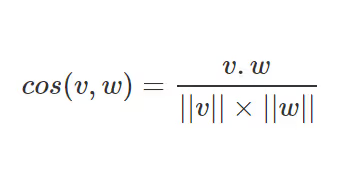

In [ ]:
cos_sim = cosine_similarity([liverpool_vector], [cs_vector])
print(f"Cosine Similarity: {cos_sim[0][0]}")

Cosine Similarity: 0.9993140697479248


In [ ]:
print(cos_sim)

[[0.99931407]]


Jaccard similarity coefficient

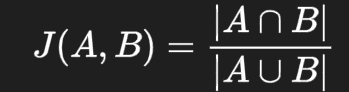

In [ ]:
def jaccard_similarity(x,y):
    intersection = len(set.intersection(*[set(x), set(y)]))
    union = len(set.union(*[set(x), set(y)]))
    return intersection / float(union)

jac_sim = jaccard_similarity(liverpool, cs)
print(f"Jaccard Similarity: {jac_sim}")

Jaccard Similarity: 0.01639344262295082


Euclidean Distance

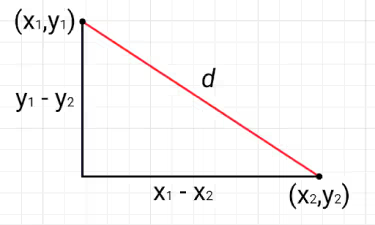

In [ ]:
from scipy.spatial.distance import euclidean

euclidean_distance = euclidean(liverpool_vector, cs_vector)
print(f"Euclidean Distance: {euclidean_distance}")

Euclidean Distance: 0.0860183909535408


In [ ]:
print("Liverpool Vector Shape:", liverpool_vector.shape)
print("Computer Science Vector Shape:", cs_vector.shape)


Liverpool Vector Shape: (100,)
Computer Science Vector Shape: (100,)


# Visualization

Heat Maps

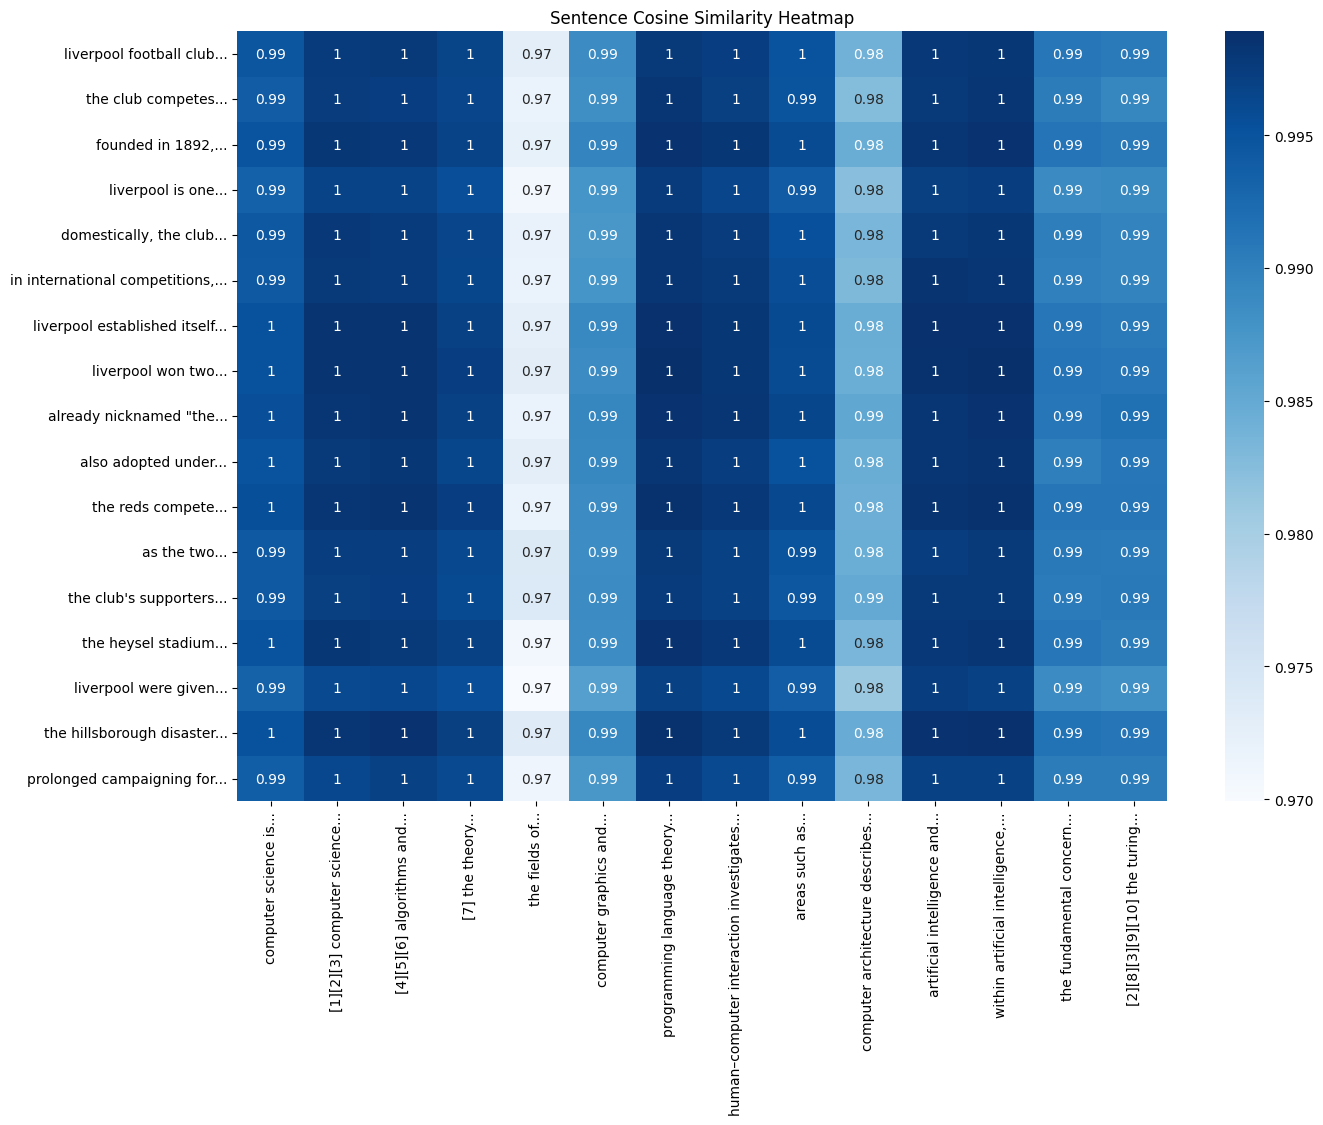

In [ ]:
cosimilarity = []
for i in range(len(liverpool_vectors)):
    row = []
    for j in range(len(cs_vectors)):
        sim = cosine_similarity(liverpool_vectors[i], cs_vectors[j])[0][0]
        row.append(sim)
    cosimilarity.append(row)
plt.figure(figsize=(15, 10))
sns.heatmap(cosimilarity, annot=True, cmap="Blues", xticklabels=cs_sentences_truncated, yticklabels=liverpool_sentences_truncated)
plt.title("Sentence Cosine Similarity Heatmap")
plt.show()

In [ ]:
similarity_jaccard = []
for i in range(len(liverpool_clean)):
    row = []
    for j in range(len(cs_clean)):
        sim = jaccard_similarity(set(liverpool_clean[i]), set(cs_clean[j]))
        row.append(sim)
    similarity_jaccard.append(row)

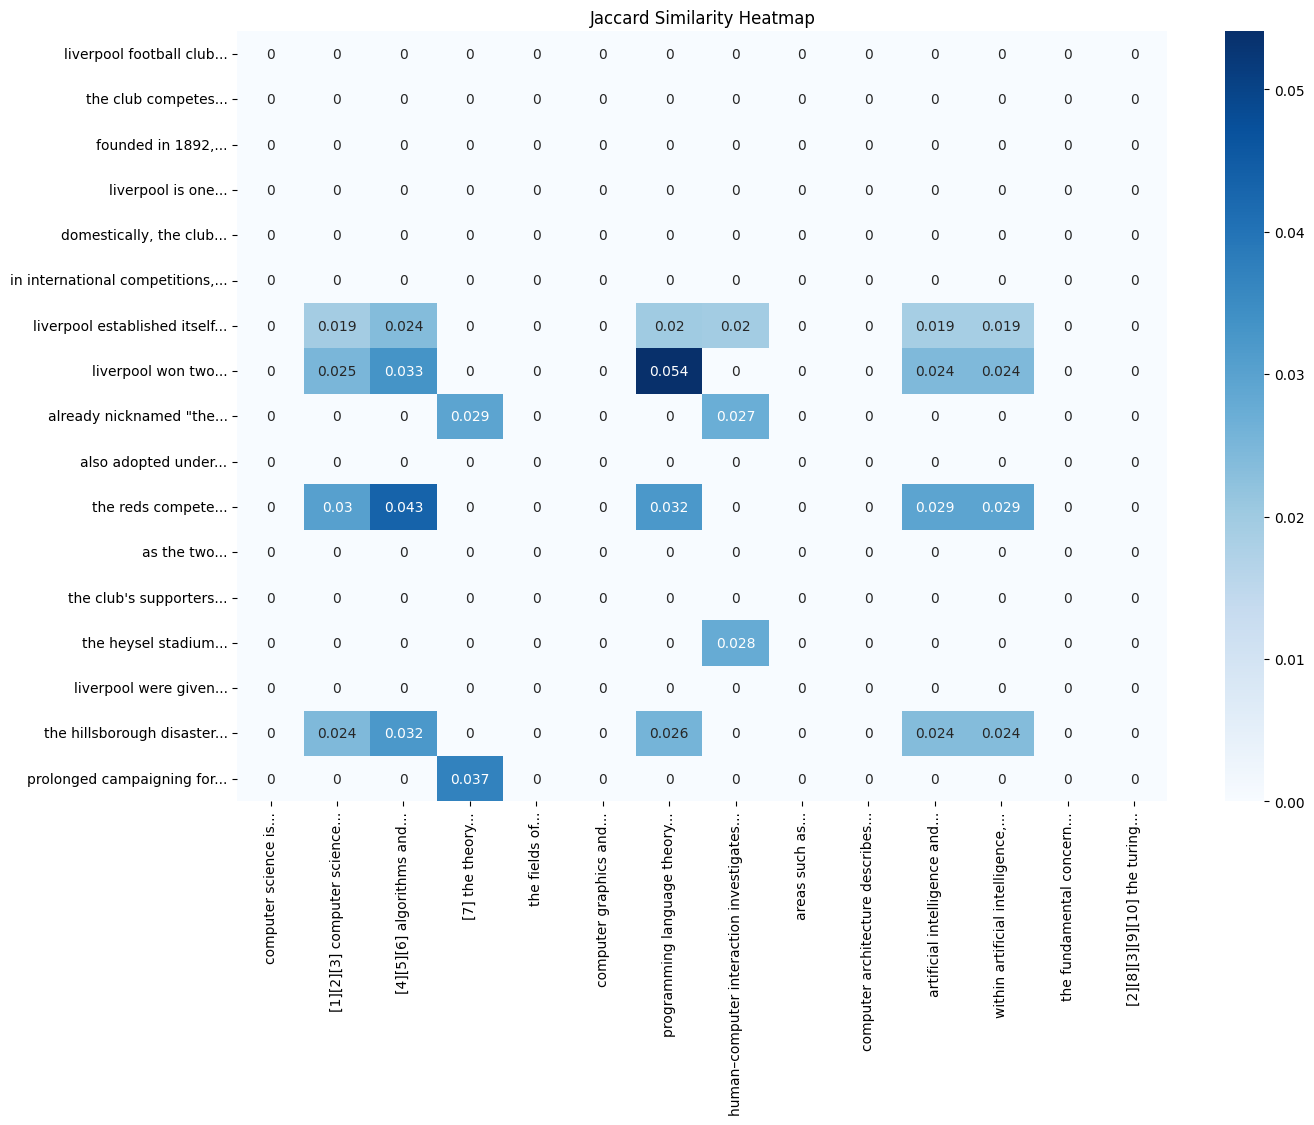

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(similarity_jaccard, annot=True, cmap="Blues", xticklabels=cs_sentences_truncated, yticklabels=liverpool_sentences_truncated)
plt.title("Jaccard Similarity Heatmap")
plt.show()

MDS

In [ ]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

liverpool_vectors = [get_sentence_vector(sentence, model) for sentence in liverpool_clean]
cs_vectors = [get_sentence_vector(sentence, model) for sentence in cs_clean]
all_vectors = liverpool_vectors + cs_vectors
cosine_sim_matrix = cosine_similarity(all_vectors)
cosine_distance_matrix = 1 - cosine_sim_matrix

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_transformed = mds.fit_transform(cosine_distance_matrix)

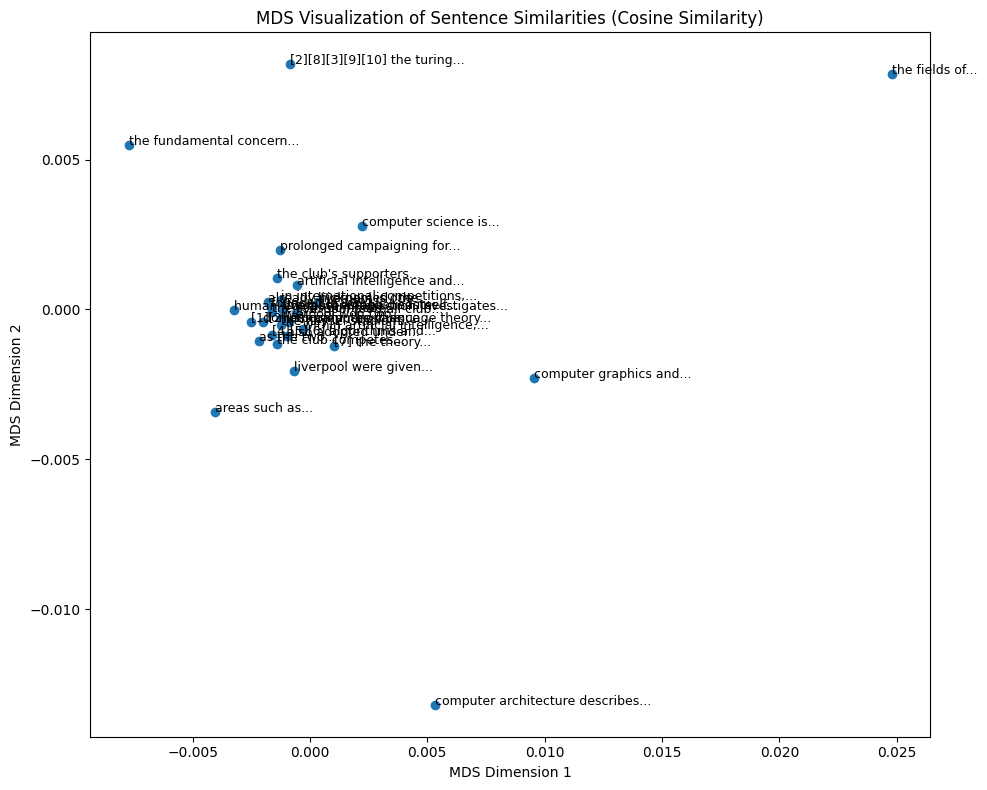

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1])
for i, sentence in enumerate(liverpool_sentences_truncated + cs_sentences_truncated):
    plt.annotate(sentence, (mds_transformed[i, 0], mds_transformed[i, 1]), fontsize=9)

plt.title("MDS Visualization of Sentence Similarities (Cosine Similarity)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.tight_layout()
plt.show()

# Analysis

###1- **Cosine Similarity**:

Computes the similarity of two vectors as the cosine of the angle between two vectors.
It determines if two vectors are pointing in  the same direction,as its value gets biggerthe angle between two vectors is smaller  

**Strengths**:

-Not affected by the magnitude/length of the feature vectors

-cosine similarity is generally preferred when working with text data

**Limitation**: Best for semantically related Documents , as it doesn't consider unique overlaps .




###2- **Jaccard Similarity**:

Measures only the set of unique words for each text document.

**Strengths**: Works well when repetition is not an issue.

**Limitation**: Limited to sparse data , not effective for comparing documents with many unique words.




###3-**Euclidean Distance**:

It uses the Pythagoras theorem to calculate the distance between two points.

**Strengths**:
   Euclidean distance is easy to interpret, as it measures the **direct distance** between two vectors. This gives a sense of "how far apart" the documents are in the vector space.

**Limitation**:

   -Affected by the magnitude/length of the feature vectors

   -doesn’t work well with the sparse vectors of text embeddings.   

In [ ]:
print("Cosine Similarity:",cos_sim)
print("Jaccard Similarity:",jac_sim)
print("Euclidean Distance:",euclidean_distance)

Cosine Similarity: [[0.99931407]]
Jaccard Similarity: 0.01639344262295082
Euclidean Distance: 0.0860183909535408


**Cosine Similarity=0.9993140697479248**

very close to 1,the two document vectors follow the same direction.

**Jaccard Similarity=0.01639344262295082**

very low, which means a small intersection set and the documents have unique authentic words.

**Euclidean Distance=0.0860183909535408**
The Euclidean distance is low, which means that the documents are close to each other in the vector space.

###**Conclusion**:

The two documents are close to each other in the vector space and point at the same direction , but are unique in their content with minimal overlapping  